# Presentación

El conjunto de datos corresponde al contexto de Salud, más precisamente al sector médico
<br>
<br>
En este proyecto, el conjunto de datos que utilizaremos nos brinda de variables que nos
permite predecir si una persona está teniendo un ataque de corazón.
El conjunto fue obtenido del sitio Kaggle (por medio de este link
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility),
<br>
<br>
El objetivo de este proyecto es identificar las variables importantes y poder predecir con las
mismas si una persona tiene un ataque al corazón con una precisión mayor de 80 %
aplicando un algoritmo de clasificación.

### Análisis

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb

In [3]:
# Configuracion para que se mestren todas las columnas
pd.set_option('display.max_columns', None)
# Configuracion para que los valores no se muestren con punto flotante
pd.options.display.float_format = '{:,.2f}'.format
# Lectura del fichero
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tenemos un dataset de 14 columnas y 303 filas, no tenemos valores nulos y nuestra variable objetivo es target, que indica si la persona tuvo o no ataque al corazón.

Analizaremos cada variable

#### Age: Edad

In [6]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [7]:
df['age'].describe()

count   303.00
mean     54.37
std       9.08
min      29.00
25%      47.50
50%      55.00
75%      61.00
max      77.00
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

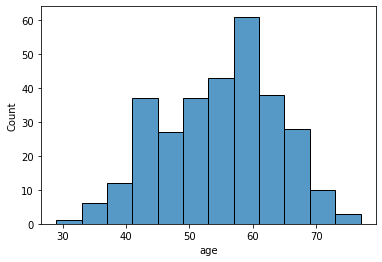

In [8]:
sns.histplot(data=df, x="age")

<AxesSubplot:xlabel='age'>

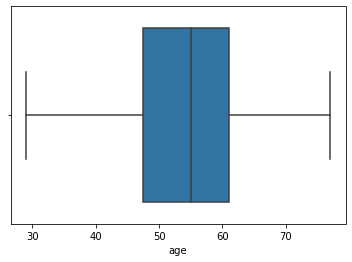

In [9]:
sns.boxplot(x=df["age"])

Tenemos persones de entre 29 y 77 años, con un promedio y media cercano a los 55 años. Su distribucion es casi Normal.

#### Sex: Sexo

In [10]:
df['sex'].unique()

array([1, 0], dtype=int64)

Podemos observar que es una variable caterogica. El 1 presenta al sexo masculino y el 0 el femenino.

In [11]:
df['sex'].describe()

count   303.00
mean      0.68
std       0.47
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: sex, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

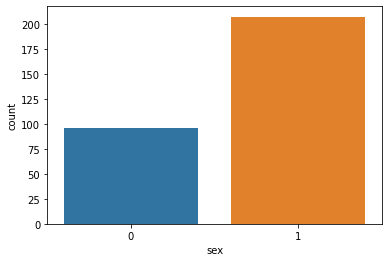

In [12]:
sns.countplot(x="sex", data=df)

Podemos observar un desbalanceo, tenemos más hombres que mujeres.

#### cp: Dolor de pecho

In [13]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

Podemos observar que es una variable caterogica. Estos valores son:
   * 0: Angina típica
   * 1: Angina atípica
   * 2: Dolor no anginoso
   * 3: Asintomático

In [14]:
df['cp'].describe()

count   303.00
mean      0.97
std       1.03
min       0.00
25%       0.00
50%       1.00
75%       2.00
max       3.00
Name: cp, dtype: float64

<AxesSubplot:xlabel='cp', ylabel='count'>

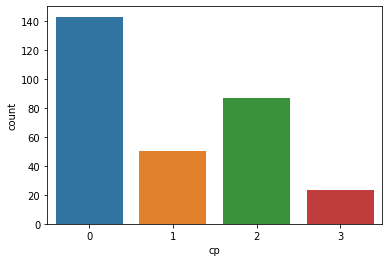

In [15]:
sns.countplot(x="cp", data=df)

Podemos observar un desbalanceo de datos aqui también y que la mayoría de los casos son de angina típica.

#### trestbps: Presión arterial en reposo

In [16]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [17]:
df['trestbps'].describe()

count   303.00
mean    131.62
std      17.54
min      94.00
25%     120.00
50%     130.00
75%     140.00
max     200.00
Name: trestbps, dtype: float64

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

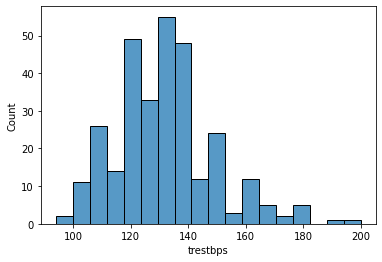

In [18]:
sns.histplot(data=df, x="trestbps")

<AxesSubplot:xlabel='trestbps'>

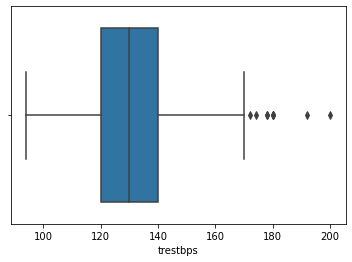

In [19]:
sns.boxplot(x=df["trestbps"])

Podemos observar algunos outliners para esta columna de presión arterial en reposo.

In [120]:
outliers = []
def detectar_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detectar_outliers(df["trestbps"])
print("Outliers: ", sample_outliers)

Outliers:  [172, 174, 178, 178, 180, 180, 180, 192, 200]


Tenemos 9 registros con outliners.

In [118]:
df[df["trestbps"].isin([172, 174, 178, 178, 180, 180, 180, 192, 200])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.00,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.60,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.00,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.00,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.00,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.00,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.40,1,0,2,0


Como son pocos datos, y la mayoría datos son con target 0 (de los que tenemos menos que de target 1) los dejaremos como están.

#### chol: Colesterol sérico en mg / dl 

In [20]:
df['chol'].describe()     

count   303.00
mean    246.26
std      51.83
min     126.00
25%     211.00
50%     240.00
75%     274.50
max     564.00
Name: chol, dtype: float64

<AxesSubplot:xlabel='chol', ylabel='Count'>

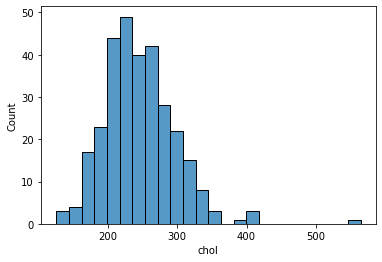

In [21]:
sns.histplot(data=df, x="chol")

<AxesSubplot:xlabel='chol'>

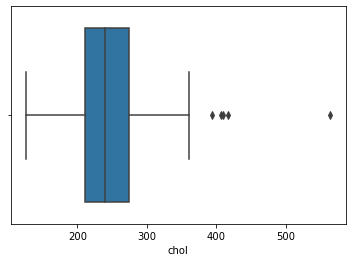

In [22]:
sns.boxplot(x=df["chol"])

En el colesterol sérico podemos observar algunos outliners.

In [141]:
outliers = []
sample_outliers = detectar_outliers(df["chol"])
print("Outliers: ", sample_outliers)

Outliers:  [394, 407, 409, 417, 564]


Tenemos 5 registros con outliners.

In [142]:
df[df["chol"].isin([394, 407, 409, 417, 564])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.80,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.60,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.20,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.00,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.90,1,2,3,0


Podemos ver que son todos de sexo masculino y un promedio de 63 años. Como son pocos datos, los dejamos.

#### fbs: Glucemia > 120 mg/dl

In [23]:
df['fbs'].unique()

array([1, 0], dtype=int64)

Podemos observar que es una variable caterogica.

In [24]:
df['fbs'].describe()

count   303.00
mean      0.15
std       0.36
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       1.00
Name: fbs, dtype: float64

<AxesSubplot:xlabel='fbs', ylabel='count'>

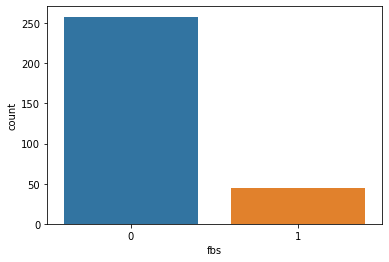

In [25]:
sns.countplot(x="fbs", data=df)

Podemos ver un gran desbalanceo.

#### restecg: resultados electrocardiográficos en reposo

In [26]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

Podemos observar que es una variable caterogica.
   * 0: Normal
   * 1: Tiene anomalía en la onda ST-T 
   * 2: Muestra hipertrofia ventricular izquierda probable o definitiva 

In [27]:
df['restecg'].describe()

count   303.00
mean      0.53
std       0.53
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       2.00
Name: restecg, dtype: float64

<AxesSubplot:xlabel='restecg', ylabel='count'>

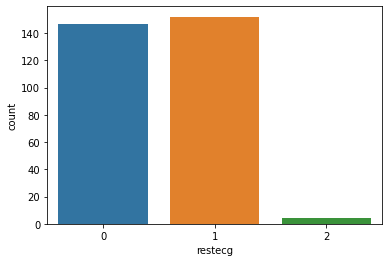

In [28]:
sns.countplot(x="restecg", data=df)

Podemos ver que para el valor 2 tenemos pocos casos.

#### thalach: Frecuencia cardíaca máxima alcanzada

In [29]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [30]:
df['thalach'].describe()

count   303.00
mean    149.65
std      22.91
min      71.00
25%     133.50
50%     153.00
75%     166.00
max     202.00
Name: thalach, dtype: float64

<AxesSubplot:xlabel='thalach', ylabel='Count'>

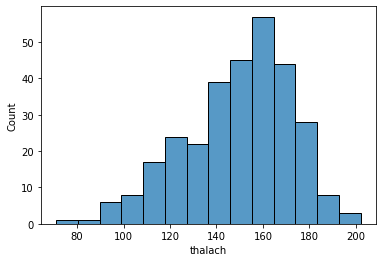

In [31]:
sns.histplot(data=df, x="thalach")

<AxesSubplot:xlabel='thalach'>

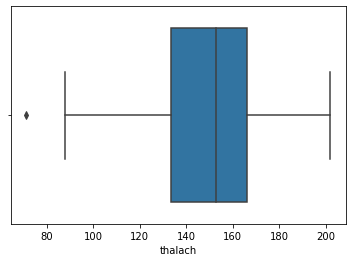

In [32]:
sns.boxplot(x=df["thalach"])

Ovservamos que los resultados electrocardiográficos en reposo tiene una distribución casi Normal.

#### exang: Angina inducida por ejercicio

In [33]:
df['exang'].unique()

array([0, 1], dtype=int64)

Podemos observar que es una variable caterogica.

In [34]:
df['exang'].describe()

count   303.00
mean      0.33
std       0.47
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: exang, dtype: float64

<AxesSubplot:xlabel='exang', ylabel='count'>

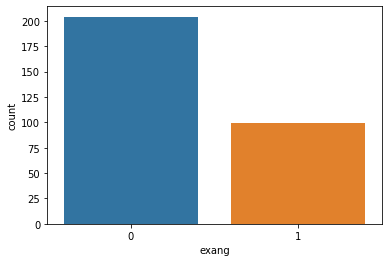

In [35]:
sns.countplot(x="exang", data=df)

La mayoria de las personas no presenta angina inducida por ejercicio

#### oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo

In [36]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

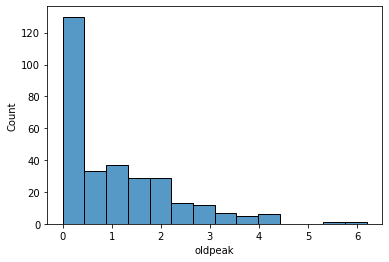

In [37]:
sns.histplot(data=df, x="oldpeak")

<AxesSubplot:xlabel='oldpeak'>

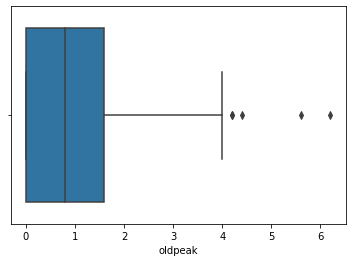

In [38]:
sns.boxplot(x=df["oldpeak"])

Aqui podemos observar unos pequeños outliners.

In [143]:
outliers = []
sample_outliers = detectar_outliers(df["oldpeak"])
print("Outliers: ", sample_outliers)

Outliers:  [4.2, 4.2, 4.4, 5.6, 6.2]


Tenemos 5 registros con outliners.

In [144]:
df[df["oldpeak"].isin([4.2, 4.2, 4.4, 5.6, 6.2])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.20,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.20,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.60,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.20,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.40,0,3,1,0


Como son pocos datos, y la mayoría datos son con target 0 (de los que tenemos menos que de target 1) los dejaremos como están.

#### slope: la pendiente del segmento ST en pico del ejercicio

In [39]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

Podemos observar que es una variable caterogica.
   * 0: Pendiente ascendente
   * 1: Plana Tiene anomalía en la onda ST-T 
   * 2: Pendiente descendente

In [40]:
df['slope'].describe()

count   303.00
mean      1.40
std       0.62
min       0.00
25%       1.00
50%       1.00
75%       2.00
max       2.00
Name: slope, dtype: float64

<AxesSubplot:xlabel='slope', ylabel='count'>

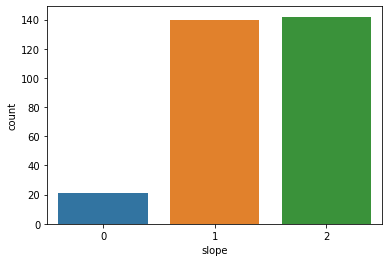

In [41]:
sns.countplot(x="slope", data=df)

La mayoría de los casos con pendiente plana o descendente

#### ca: Número de vasos principales coloreados por fluoroscopia

In [42]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

Podemos observar que es una variable caterogica.

In [43]:
df['ca'].describe()

count   303.00
mean      0.73
std       1.02
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       4.00
Name: ca, dtype: float64

<AxesSubplot:xlabel='ca', ylabel='count'>

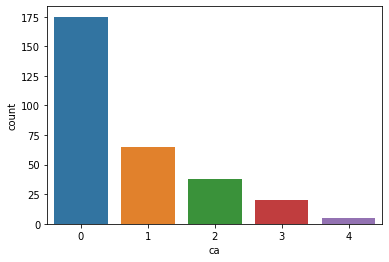

In [44]:
sns.countplot(x="ca", data=df)

#### thal

In [45]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

Podemos observar que es una variable caterogica.

In [46]:
df['thal'].describe()

count   303.00
mean      2.31
std       0.61
min       0.00
25%       2.00
50%       2.00
75%       3.00
max       3.00
Name: thal, dtype: float64

<AxesSubplot:xlabel='thal', ylabel='count'>

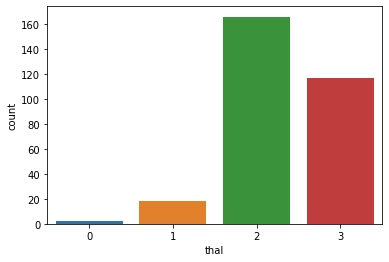

In [47]:
sns.countplot(x="thal", data=df)

#### target: O poca probabilidad de ataque, 1 alta probaabilidad de ataque

<AxesSubplot:xlabel='target', ylabel='count'>

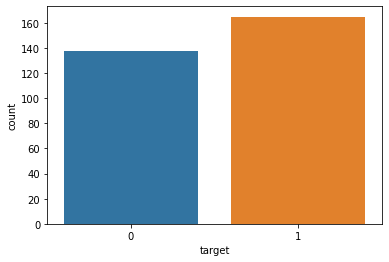

In [48]:
sns.countplot(x="target", data=df)

La variable objetivo es binaria, y tenemos un buen balance de datos.

<AxesSubplot:xlabel='sex', ylabel='count'>

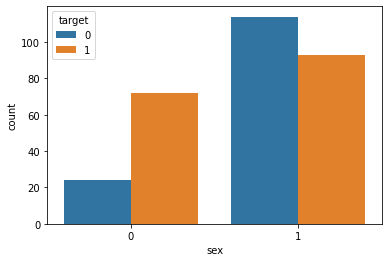

In [49]:
sns.countplot(x="sex", hue="target", data=df)

Aqui podemos ver que la mayoría de ataque al corazón son en los hombres, pero también tenemos más registros de hombres que de mujeres.

<AxesSubplot:xlabel='cp', ylabel='count'>

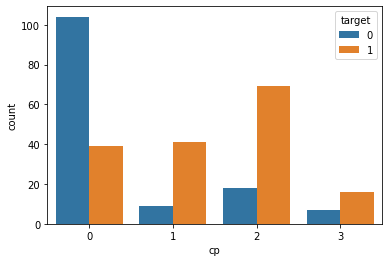

In [50]:
sns.countplot(x="cp", hue="target", data=df)

Podemos observar que la mayor probabilidad de ataque al corazón son para el caso de una angina típica.

<AxesSubplot:xlabel='slope', ylabel='count'>

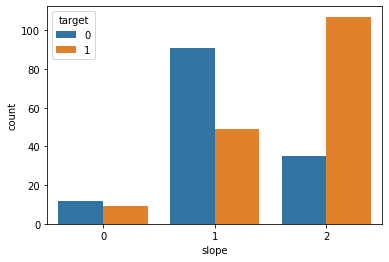

In [51]:
sns.countplot(x="slope", hue="target", data=df)

Podemos observar que la mayor probabilidad de ataque al corazón son cuando la pendiente es plana.

<AxesSubplot:xlabel='age', ylabel='Count'>

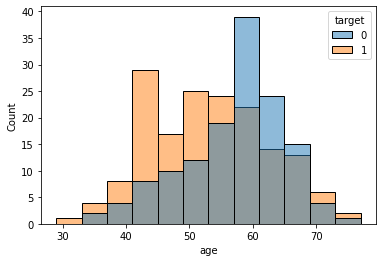

In [52]:
sns.histplot(x="age", hue="target", data=df)

Nuestra variable objetivo está bastante balanceada en relación a la edad.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [55]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


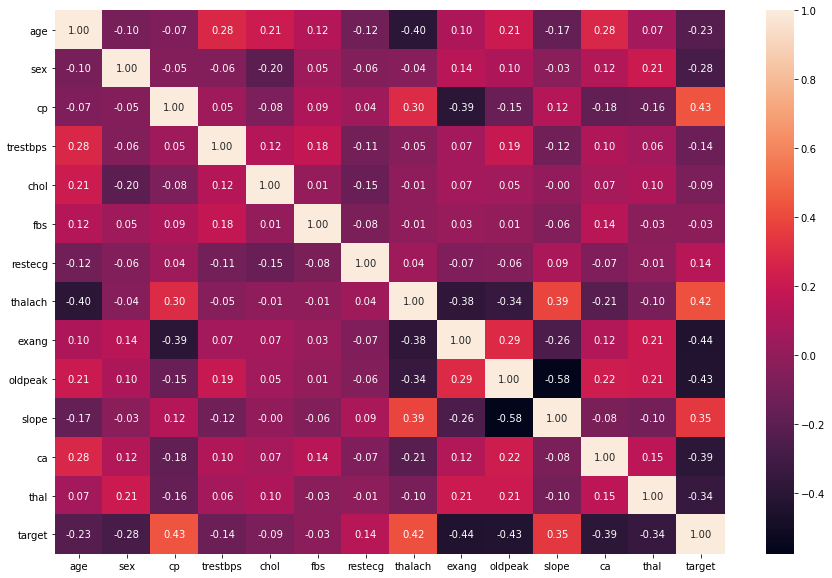

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Podemos ver que las variables que están correlacionadas con la variable objetivo casi todos menos restecg, fbs, chol y trestbps

### Pre Processing y Modelos

Tenemos 6 variables categóricas una vez que borremos las variables menos importantes.
<br>
Como los valores de estas varían de 0 a 4, y eso nos podría perjudicar el modelo, por lo que haremos es crear una columna por cada valor utilizando OneHotEncoder.
<br>
En el caso de las variables numéricas, las standarizaremos para que esten en la msma escala. 
Utilizaremos un pipeline para todo el proceso.

In [4]:
drop_columns = ['restecg', 'fbs', 'chol', 'trestbps']
category_columns = ['thal', 'ca', 'slope', 'exang','cp','sex']
numeric_columns = ['age', 'thalach', 'oldpeak']

df['thal'] = df['thal'].astype('category')
df['ca'] = df['ca'].astype('category')
df['slope'] = df['slope'].astype('category')
df['exang'] = df['exang'].astype('category')
df['cp'] = df['cp'].astype('category')
df['sex'] = df['sex'].astype('category')

# Definimos el column transformer, donde se eliminan las columnas que no nos nteresan
# y se transforman las que nos interesan
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', drop_columns),
                                              ('onehot', OneHotEncoder(handle_unknown = 'ignore'), category_columns),
                                              ('scaler', StandardScaler(), numeric_columns)])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.30, random_state=42)

Para problemas de clasificación tenemos distintos algoritmos:
   * DecisionTreeClassifier
   * LogisticRegression
   * XGBClassifier
   * KNeighborsClassifier
   * SVC

Veremos y analizaremos los resultados de cada uno, y para esto haremos uso de GridSearch para obtener los hyper parameters más optimos.

##### DecisionTreeClassifier

In [166]:
pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("DecisionTreeClassifier", DecisionTreeClassifier())
])

dtc_param = {'DecisionTreeClassifier__criterion': ['entropy', 'gini'], 
              'DecisionTreeClassifier__splitter': ['best', 'random'],
              'DecisionTreeClassifier__max_features': ['auto', 'sqrt', 'log2'],
              'DecisionTreeClassifier__min_samples_split': np.arange(3, 10), 
              'DecisionTreeClassifier__max_depth': np.arange(3, 10), 
              'DecisionTreeClassifier__min_samples_leaf': np.arange(2, 10)} 
dtc_search = GridSearchCV(pipeline, dtc_param, cv=7, scoring='recall', n_jobs=-1)

search = dtc_search.fit(X_train, y_train)
print(search.best_params_)

{'DecisionTreeClassifier__criterion': 'entropy', 'DecisionTreeClassifier__max_depth': 3, 'DecisionTreeClassifier__max_features': 'auto', 'DecisionTreeClassifier__min_samples_leaf': 3, 'DecisionTreeClassifier__min_samples_split': 7, 'DecisionTreeClassifier__splitter': 'best'}


In [169]:
search.best_score_

0.9217436974789915

In [170]:
search.best_estimator_

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['restecg', 'fbs', 'chol',
                                                   'trestbps']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'cp', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'thalach',
                                                   'oldpeak'])])),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_features='auto'

In [171]:
dtc_pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("DecisionTreeClassifier", DecisionTreeClassifier(criterion='entropy',
                                                      max_depth=3, max_features='auto',
                                                      min_samples_leaf=3,
                                                      min_samples_split=7,
                                                      splitter='best'))
])

In [172]:
dtc_pipeline.fit(X_train, y_train)
Y_dtc_train_pred = dtc_pipeline.predict(X_train)

In [173]:
metrics.accuracy_score(y_train, Y_dtc_train_pred)

0.8301886792452831

In [174]:
y_dtc_test_pred = dtc_pipeline.predict(X_test)
metrics.accuracy_score(y_test, y_dtc_test_pred)

0.8241758241758241

In [175]:
dt_cm = metrics.confusion_matrix(y_test, y_dtc_test_pred)
print(dt_cm)

[[33  8]
 [ 8 42]]


In [176]:
report = metrics.classification_report(y_test, y_dtc_test_pred, digits=3, output_dict = True)
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Sensitivity-Recall = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Accuracy = 0.824
Precision = 0.840
Sensitivity-Recall = 0.840
F1-score = 0.840


<AxesSubplot:>

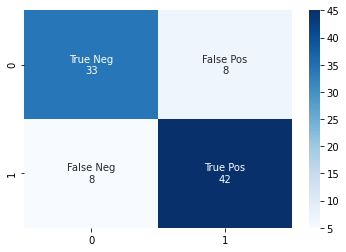

In [178]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = dt_cm.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_cm2, annot=labels, fmt='', cmap='Blues')

Tenemos un buen accuracy de 82.4%, y un bajo número de falsos negativos, generando un recall de 0.84.
En este caso priorizaremos el recall, ya que es mejor tener un falso positivo que un falso negativo.
<br>
<br>
Veremos que resultados tendremos con otros modelos.

##### LogisticRegression

In [183]:
pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("LogisticRegression", LogisticRegression())
])

lr_param = {'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet', 'none']} 
lr_search = GridSearchCV(pipeline, lr_param, cv=7, scoring='recall', n_jobs=-1)

lr_search.fit(X_train, y_train)
print(lr_search.best_params_)

{'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}


In [185]:
lr_search.best_score_

0.8697478991596638

In [184]:
lr_search.best_estimator_

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['restecg', 'fbs', 'chol',
                                                   'trestbps']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['thal', 'ca', 'slope',
                                                   'exang', 'cp', 'sex']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'thalach',
                                                   'oldpeak'])])),
                ('LogisticRegression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [191]:
lr_pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("LogisticRegression", LogisticRegression(solver='liblinear', penalty='l1'))
])

In [192]:
lr_pipeline.fit(X_train, y_train)
lr_Y_train_pred = lr_pipeline.predict(X_train)

In [193]:
metrics.accuracy_score(y_train, lr_Y_train_pred)

0.8773584905660378

In [194]:
lr_y_test_pred = lr_pipeline.predict(X_test)
metrics.accuracy_score(y_test, lr_y_test_pred)

0.8571428571428571

In [197]:
report = metrics.classification_report(y_test, lr_y_test_pred, digits=3, output_dict = True)
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Sensitivity-Recall = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Accuracy = 0.857
Precision = 0.849
Sensitivity-Recall = 0.900
F1-score = 0.874


In [198]:
lr_cm = metrics.confusion_matrix(y_test, lr_y_test_pred)
print(lr_cm)

[[33  8]
 [ 5 45]]


<AxesSubplot:>

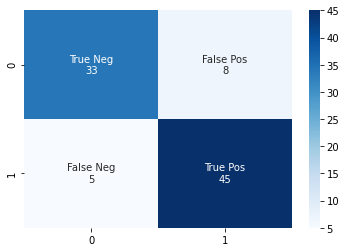

In [199]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = lr_cm.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_cm2, annot=labels, fmt='', cmap='Blues')

En este caso hemos obtenido mejores resultados, un mayor accuracy, hemos reducido los falsos negativos a 5 y aumentado por ende el recall a 0.90.

##### xgboost

In [201]:
model = xgb.XGBClassifier()
pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("model", model)
])

xgb_param = {'model__booster': ['gbtree', 'gblinear', 'dart'], 
              'model__max_depth': np.arange(3, 10)}

xgb_search = GridSearchCV(pipeline, xgb_param, cv=7, scoring='recall', n_jobs=-1)
xgb_search.fit(X_train, y_train)

C:\Users\Ale\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['restecg',
                                                                          'fbs',
                                                                          'chol',
                                                                          'trestbps']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['thal',
                                                        

In [203]:
print(xgb_search.best_params_)

{'model__booster': 'gbtree', 'model__max_depth': 6}


In [204]:
model = xgb.XGBClassifier(model__booste='gbtree', model__max_depth=6)
xgb_pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("model", model)
])

xgb_pipeline.fit(X_train, y_train)
xgb_Y_train_pred = xgb_pipeline.predict(X_train)

[20:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { model__booste, model__max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ale\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [205]:
metrics.accuracy_score(y_train, xgb_Y_train_pred)

1.0

In [206]:
xgb_y_test_pred = xgb_pipeline.predict(X_test)
metrics.accuracy_score(y_test, xgb_y_test_pred)

0.8241758241758241

In [207]:
xgb_cm = metrics.confusion_matrix(y_test, xgb_y_test_pred)
print(xgb_cm)

[[34  7]
 [ 9 41]]


In [208]:
report = metrics.classification_report(y_test, xgb_y_test_pred, digits=3, output_dict = True)
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Sensitivity-Recall = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Accuracy = 0.824
Precision = 0.854
Sensitivity-Recall = 0.820
F1-score = 0.837


<AxesSubplot:>

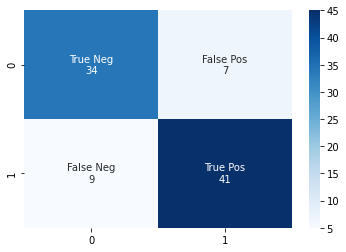

In [209]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = xgb_cm.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_cm2, annot=labels, fmt='', cmap='Blues')

En este caso hemos obtenido mejores resultados pero no tanto comparando con los de Logistic Regression.

##### KNeighborsClassifier

In [210]:
pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("model", KNeighborsClassifier())
])

kn_param = {'model__n_neighbors': np.arange(2, 11),
               'model__weights': ['uniform', 'distance'],
             'model__algorithm':['auto', 'ball_tree','kd_tree','brute'],
             'model__p':[1, 2]}

kn_search = GridSearchCV(pipeline, kn_param, cv=7, scoring='recall', n_jobs=-1)
kn_search.fit(X_train, y_train)
print(kn_search.best_params_)

{'model__algorithm': 'auto', 'model__n_neighbors': 8, 'model__p': 2, 'model__weights': 'distance'}


In [217]:
kn_pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("KNeighborsClassifier", KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=2, weights='distance'))
])

kn_pipeline.fit(X_train, y_train)
kn_Y_train_pred = kn_pipeline.predict(X_train)

In [218]:
metrics.accuracy_score(y_train, kn_Y_train_pred)

1.0

In [219]:
kn_y_test_pred = kn_pipeline.predict(X_test)
metrics.accuracy_score(y_test, kn_y_test_pred)

0.8901098901098901

In [220]:
kn_cm = metrics.confusion_matrix(y_test, kn_y_test_pred)
print(kn_cm)

[[37  4]
 [ 6 44]]


In [221]:
report = metrics.classification_report(y_test, kn_y_test_pred, digits=3, output_dict = True)
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Sensitivity-Recall = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Accuracy = 0.890
Precision = 0.917
Sensitivity-Recall = 0.880
F1-score = 0.898


<AxesSubplot:>

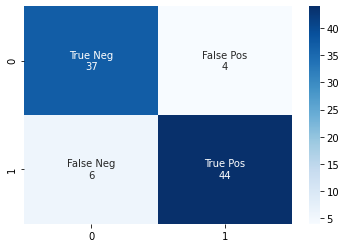

In [216]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = kn_cm.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(kn_cm, annot=labels, fmt='', cmap='Blues')

Aqui tenemos la misma situación que con xgboost, mejor resultados pero no como Logistic Regression.

##### SVM

In [225]:
model = svm.SVC()
pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("model", model)
])

svm_param = {'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
             'model__C': [0.001,0.01,0.1,1,10,100,1000],
             'model__degree': [1,2,3,4,5]}

svm_search = GridSearchCV(pipeline, svm_param, cv=7, scoring='recall', n_jobs=-1)
svm_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['restecg',
                                                                          'fbs',
                                                                          'chol',
                                                                          'trestbps']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['thal',
                                                        

In [224]:
print(svm_search.best_params_)

{'model__C': 0.001, 'model__degree': 1, 'model__kernel': 'linear'}


In [227]:
model = svm.SVC(kernel='linear', C=0.001, degree=1)
svm_pipeline = Pipeline([
    ('pre_processing', pre_process),
    ("model", model)
])
svm_pipeline.fit(X_train, y_train)
svm_Y_train_pred = svm_pipeline.predict(X_train)
metrics.accuracy_score(y_train, svm_Y_train_pred)

0.5424528301886793

In [228]:
svm_y_test_pred = svm_pipeline.predict(X_test)
metrics.accuracy_score(y_test, svm_y_test_pred)

0.5494505494505495

In [229]:
svm_cm = metrics.confusion_matrix(y_test, svm_y_test_pred)
print(svm_cm)

[[ 0 41]
 [ 0 50]]


In [230]:
report = metrics.classification_report(y_test, svm_y_test_pred, digits=3, output_dict = True)
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1"]["precision"]))
print("Sensitivity-Recall = {0:0.3f}".format(report["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1"]["f1-score"]))

Accuracy = 0.549
Precision = 0.549
Sensitivity-Recall = 1.000
F1-score = 0.709


C:\Users\Ale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

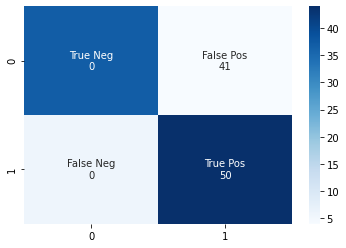

In [231]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = svm_cm.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(kn_cm, annot=labels, fmt='', cmap='Blues')

#####  En conclusión podemos decir que el mejor modelo para este conjunto de datos es del KNeighborsClassifier, ya que tuvimos menos falsos negativos, y menos falsos positivos con una buena precisión.